In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root='data/', download= True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset= MNIST(root='data/', train= False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x26CCA26BCD0>, 5)

In [9]:
! pip install matplotlib


In [32]:
! pip install torch --upgrade


  Attempting uninstall: torch
    Found existing installation: torch 1.10.2
    Uninstalling torch-1.10.2:
      Successfully uninstalled torch-1.10.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.3 requires torch==1.10.2, but you have torch 1.11.0 which is incompatible.
torchaudio 0.10.2 requires torch==1.10.2, but you have torch 1.11.0 which is incompatible.


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

label 5


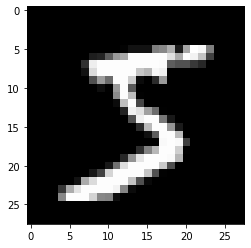

In [15]:
image, label= dataset[0]
plt.imshow(image,cmap= 'gray')
print('label' ,label)

In [16]:
import torchvision.transforms as transforms

In [17]:
dataset= MNIST(root= 'data/', train= True, transform = transforms.ToTensor())

In [18]:
img_tensor , label= dataset[0]

print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [19]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


In [20]:
print(torch.max(img_tensor),torch.min(img_tensor))

tensor(1.) tensor(0.)


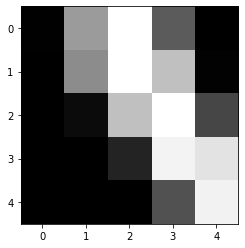

In [22]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [23]:
  
import numpy as np
def split_indices(n , val_pct):
    n_val = int(val_pct*n)
    idxs= np.random.permutation(n)
    
    return idxs[n_val:], idxs[:n_val]

In [25]:
train_indices, val_indices= split_indices(len(dataset), val_pct=0.2)


In [26]:
print(train_indices, val_indices)

[ 2865 37489 12423 ... 43157 45871 46963] [46411 15525 25731 ... 47180 25490 49934]


In [27]:
print(len(train_indices),len(val_indices))

48000 12000


In [28]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [29]:
batch_size=100
train_sampler= SubsetRandomSampler(train_indices)
train_loader= DataLoader(dataset, batch_size,sampler= train_sampler)

val_sampler= SubsetRandomSampler(val_indices)
val_loader= DataLoader(dataset, batch_size,sampler= val_sampler)

In [30]:
! pip install jovian --upgrade


  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=bb50469b3b2e7cb341393062dd3c9a6175d8d4958db4f545fbef6040eca4759d
  Stored in directory: c:\users\anshul\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


In [34]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/chamoli11/logisticregressionimageclassification


'https://jovian.ai/chamoli11/logisticregressionimageclassification'

In [62]:
import torch.nn as nn
input_size= 28*28
num_classes= 10

model= nn.Linear(input_size, num_classes)

print(model.weight.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([ 0.0095,  0.0155,  0.0277,  0.0058, -0.0122, -0.0126,  0.0138,  0.0239,
         0.0147,  0.0225], requires_grad=True)


In [39]:
# for images , labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs= model(images)
#     break

tensor([8, 3, 7, 1, 4, 6, 8, 9, 9, 7, 5, 4, 9, 6, 9, 8, 1, 0, 8, 2, 4, 5, 8, 3,
        4, 6, 8, 9, 0, 8, 4, 4, 2, 3, 2, 7, 8, 7, 4, 3, 7, 8, 7, 3, 1, 5, 7, 6,
        8, 4, 0, 3, 4, 4, 5, 9, 6, 3, 7, 9, 8, 6, 6, 1, 5, 7, 9, 8, 3, 5, 4, 9,
        3, 0, 5, 6, 8, 4, 9, 9, 9, 0, 7, 5, 0, 4, 1, 3, 9, 9, 6, 6, 5, 0, 3, 1,
        6, 8, 1, 8])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [64]:
class Mnistmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size, num_classes)
        
    def forward(self,xb):
        xb= xb.reshape(-1,784)
        out= self.linear(xb)
        return(out)
model= Mnistmodel()

In [67]:

for images, labels in train_loader:
    outputs= model(images)
    break


In [73]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0095, -0.0321,  0.0111,  ...,  0.0180, -0.0255,  0.0124],
         [ 0.0318, -0.0022, -0.0002,  ...,  0.0035,  0.0146,  0.0154],
         [-0.0043, -0.0180, -0.0065,  ..., -0.0334, -0.0211, -0.0146],
         ...,
         [ 0.0094,  0.0169,  0.0246,  ...,  0.0022,  0.0172,  0.0096],
         [-0.0256,  0.0320,  0.0200,  ..., -0.0228, -0.0270, -0.0300],
         [-0.0165,  0.0081, -0.0279,  ...,  0.0180, -0.0090, -0.0278]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0111,  0.0111, -0.0272, -0.0090,  0.0223, -0.0286, -0.0087, -0.0322,
         -0.0018, -0.0149], requires_grad=True)]

In [55]:
import torch.nn.functional as f

In [56]:
probs = f.softmax(outputs, dim= 1)

In [57]:
print(probs[:2].data)
print(torch.sum(probs[0]).item())

tensor([[0.1103, 0.0940, 0.1191, 0.0849, 0.0977, 0.1114, 0.0956, 0.1091, 0.0774,
         0.1005],
        [0.1518, 0.1267, 0.1114, 0.1193, 0.0838, 0.0816, 0.0570, 0.0855, 0.0706,
         0.1123]])
1.0000001192092896


In [60]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)


tensor([2, 0, 0, 1, 1, 5, 0, 1, 0, 4, 0, 1, 0, 1, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0,
        5, 5, 1, 1, 7, 4, 4, 4, 0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3,
        0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 4, 4, 0, 5, 3, 2, 4, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 4, 0, 0, 0, 4, 7, 0, 4, 2, 4, 1, 5, 0, 0, 0, 0, 4, 0, 4,
        0, 0, 4, 1])


In [59]:
labels

tensor([1, 5, 7, 5, 4, 1, 3, 4, 7, 1, 3, 4, 0, 4, 9, 1, 5, 2, 6, 2, 3, 8, 7, 3,
        5, 5, 6, 9, 2, 2, 8, 6, 4, 2, 5, 2, 3, 3, 7, 1, 9, 5, 0, 8, 0, 8, 8, 0,
        5, 8, 7, 0, 9, 7, 7, 2, 2, 1, 2, 9, 9, 2, 6, 5, 1, 3, 7, 8, 3, 3, 8, 4,
        3, 9, 3, 3, 9, 1, 0, 0, 5, 6, 5, 7, 6, 7, 6, 4, 8, 7, 0, 5, 9, 1, 3, 1,
        9, 7, 2, 5])

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chamoli11/logisticregressionimageclassification" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/chamoli11/logisticregressionimageclassification


'https://jovian.ai/chamoli11/logisticregressionimageclassification'

In [84]:
 def accuracy(l1, l2):
        return torch.sum(l1==l2).item()/len(l1)

In [85]:
accuracy(labels,preds)

0.11

In [87]:
loss_fn = f.cross_entropy
loss= loss_fn(outputs, labels)
print(loss)

tensor(2.2861, grad_fn=<NllLossBackward0>)


In [89]:
learning_rate= 0.001
optimizer= torch.optim.SGD(model.parameters(), lr= learning_rate)

In [96]:
def loss_batch(model, loss_func,xb,yb, opt=None, metric= None):
    preds= model(xb)
    loss= loss_func(preds,yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    metric_result= None
    if metric is not None:
        metric_result= metric(preds, yb)
        
    return loss.item(), len(xb), metric_result

In [97]:
def evaluate(model, loss_fn, valid_dl, metric= None):
    with torch.no_grad():
        results= [loss_batch(model,loss_fn,xb,yb,metric= metric)
                  for xb,yb in valid_dl]
        losses, nums, metrics= zip(*results)
        total = np.sum(nums)
        avg_loss= np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics,nums))/total
    return avg_loss, total ,avg_metric

In [98]:
def accuracy(outputs, labels):
    _, preds= torch.max(outputs, dim= 1)
    return torch.sum(preds== labels).item()/ len(preds)

val_loss, total, val_acc= evaluate(model, loss_fn, val_loader, metric= accuracy)
print( val_loss, val_acc)
    

2.2798072417577107 0.126


In [103]:
def fit(epochs, model, loss_func,opt, train_dl,valid_dl , metric= None):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss,_,_= loss_batch(model,loss_fn, xb,yb,opt)
            
        result= evaluate(model,loss_fn, valid_dl, metric)
        val_loss, total, val_acc= result
        
        if metric is None:
            print('epoch[{}/{}], loss: {:.4f}'.format(epoch+1, epochs,val_loss))
        else:
            print('epoch[{}/{}], loss: {:.4f}, {} :{:.4f}'.format(epoch+1, epochs,val_loss,metric.__name__,val_acc))
            
        


In [104]:
model= Mnistmodel()
optimizer= torch.optim.SGD(model.parameters(), lr= learning_rate)
fit(5, model, f.cross_entropy, optimizer, train_loader, val_loader, accuracy)

epoch[1/5], loss: 1.8974, accuracy :0.6518
epoch[2/5], loss: 1.5905, accuracy :0.7405
epoch[3/5], loss: 1.3757, accuracy :0.7778
epoch[4/5], loss: 1.2215, accuracy :0.7991
epoch[5/5], loss: 1.1073, accuracy :0.8135


In [105]:
fit(5, model, f.cross_entropy, optimizer, train_loader, val_loader, accuracy)
fit(5, model, f.cross_entropy, optimizer, train_loader, val_loader, accuracy)
fit(5, model, f.cross_entropy, optimizer, train_loader, val_loader, accuracy)

epoch[1/5], loss: 1.0199, accuracy :0.8213
epoch[2/5], loss: 0.9511, accuracy :0.8295
epoch[3/5], loss: 0.8957, accuracy :0.8347
epoch[4/5], loss: 0.8500, accuracy :0.8376
epoch[5/5], loss: 0.8117, accuracy :0.8407
epoch[1/5], loss: 0.7790, accuracy :0.8435
epoch[2/5], loss: 0.7508, accuracy :0.8472
epoch[3/5], loss: 0.7264, accuracy :0.8495
epoch[4/5], loss: 0.7048, accuracy :0.8527
epoch[5/5], loss: 0.6856, accuracy :0.8547
epoch[1/5], loss: 0.6684, accuracy :0.8568
epoch[2/5], loss: 0.6529, accuracy :0.8588
epoch[3/5], loss: 0.6389, accuracy :0.8604
epoch[4/5], loss: 0.6262, accuracy :0.8630
epoch[5/5], loss: 0.6145, accuracy :0.8644


Text(0.5, 1.0, 'accuracy vs no of epoch')

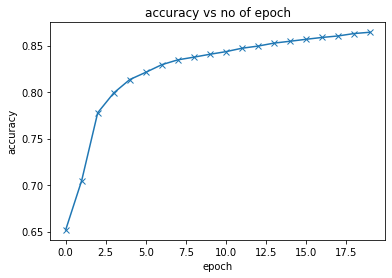

In [106]:
accuracies= [0.6518, 0.7049,0.7778,0.7991,0.8135,0.8213,0.8295,0.8347,0.8376,0.8407,0.8435,0.8472,0.8495,0.8527,0.8547,0.8568,0.8588,0.8604,0.8630,0.8644]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs no of epoch')

In [108]:
import jovian
jovian.log_hyperparams({
    'opt':'SGD',
    'lr': 0.001,
    'batch_size': 100,
    'arch': 'logistic-regression'
})

[jovian] Hyperparams logged.


In [109]:
jovian.log_metrics({
    'val_loss':0.6145,
    'val_acc': 0.8644
})

[jovian] Metrics logged.


In [110]:
test_dataset= MNIST(root='data/',
                   train= False,
                   transform= transforms.ToTensor())


shape: torch.Size([1, 28, 28])
label: 7


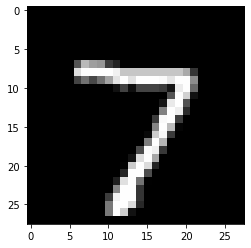

In [111]:
img, label= test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('shape:', img.shape)
print('label:', label)

In [112]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [114]:
def predict_image(img,model):
    xb= img.unsqueeze(0)
    yb= model(xb)
    _, preds= torch.max(yb, dim=1)
    return preds[0].item()

In [115]:
img, label= test_dataset[0]
print('label:', label, 'predicted:',predict_image(img,model) )

label: 7 predicted: 7


In [116]:
img, label= test_dataset[10]
print('label:', label, 'predicted:',predict_image(img,model) )

label: 0 predicted: 0


In [117]:
img, label= test_dataset[1839]
print('label:', label, 'predicted:',predict_image(img,model) )

label: 2 predicted: 8


In [118]:
img, label= test_dataset[193]
print('label:', label, 'predicted:',predict_image(img,model) )

label: 9 predicted: 9


In [121]:
torch.save(model.state_dict(), 'mnist_logictic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0080, -0.0107, -0.0314,  ..., -0.0294, -0.0299,  0.0080],
                      [ 0.0302, -0.0012,  0.0057,  ...,  0.0007, -0.0231, -0.0218],
                      [-0.0088,  0.0146,  0.0243,  ..., -0.0173,  0.0319,  0.0086],
                      ...,
                      [-0.0315,  0.0118, -0.0251,  ..., -0.0195, -0.0034,  0.0022],
                      [ 0.0325, -0.0242,  0.0019,  ..., -0.0354, -0.0192,  0.0265],
                      [ 0.0304, -0.0296, -0.0268,  ..., -0.0126,  0.0045, -0.0321]])),
             ('linear.bias',
              tensor([-0.0565,  0.1270, -0.0076, -0.0126,  0.0106,  0.0766, -0.0243,  0.0808,
                      -0.1336,  0.0011]))])

In [122]:
model2= Mnistmodel()
model2.load_state_dict(torch.load('mnist_logictic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0080, -0.0107, -0.0314,  ..., -0.0294, -0.0299,  0.0080],
                      [ 0.0302, -0.0012,  0.0057,  ...,  0.0007, -0.0231, -0.0218],
                      [-0.0088,  0.0146,  0.0243,  ..., -0.0173,  0.0319,  0.0086],
                      ...,
                      [-0.0315,  0.0118, -0.0251,  ..., -0.0195, -0.0034,  0.0022],
                      [ 0.0325, -0.0242,  0.0019,  ..., -0.0354, -0.0192,  0.0265],
                      [ 0.0304, -0.0296, -0.0268,  ..., -0.0126,  0.0045, -0.0321]])),
             ('linear.bias',
              tensor([-0.0565,  0.1270, -0.0076, -0.0126,  0.0106,  0.0766, -0.0243,  0.0808,
                      -0.1336,  0.0011]))])

In [123]:
jovian.commit(artifacts= ['mnist_logictic.pth'])

[jovian] Error: "artifacts" is deprecated. Use "outputs" instead


<IPython.core.display.Javascript object>

[jovian] Updating notebook "chamoli11/logisticregressionimageclassification" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/chamoli11/logisticregressionimageclassification


'https://jovian.ai/chamoli11/logisticregressionimageclassification'